import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#reading data set
data = pd.read_csv('fuel.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Select the features we want to consider in predicting values:

Here our goal is to predict the value of “co2 emissions” from the value of “engine size” in our dataset.

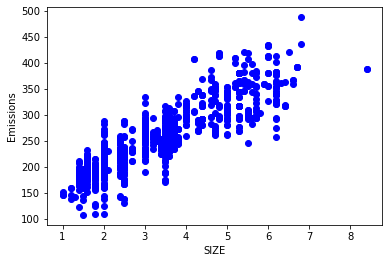

In [3]:
data=data[['ENGINESIZE','CO2EMISSIONS']]
plt.scatter(data['ENGINESIZE'],data['CO2EMISSIONS'],color='Blue')
plt.xlabel('SIZE')
plt.ylabel('Emissions')
plt.show()

visualize our data on a scatter plot.

To check the accuracy of a model, we are going to divide our data into training and testing datasets. We will use training data to train our model, and then we will check the accuracy of our model using the testing dataset.

#using sklearn package to model data

In [4]:
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])

regr.fit(train_x,train_y)

print('Coeff',regr.coef_)
print('Intercept',regr.intercept_)

Coeff [[38.79512384]]
Intercept [127.16989951]


#Based on the coefficients, we can plot the best fit line for our dataset.

Text(0, 0.5, 'Emissions')

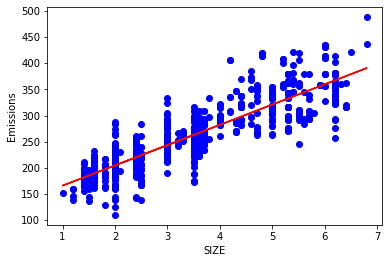

In [5]:
plt.scatter(train['ENGINESIZE'],train['CO2EMISSIONS'],color='Blue')
plt.plot(train_x,regr.coef_*train_x + regr.intercept_,'-r')
plt.xlabel('SIZE')
plt.ylabel('Emissions')

In [6]:
def get_regression_predictions(input_features,intercept,slope):
    predicted_values = input_features*slope+intercept
    
    return predicted_values

my_engine_size = 3.5

estimated_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print('Estimated Emission',estimated_emission)

Estimated Emission 262.9528329350172


Checking Accuracy

In [7]:
from sklearn.metrics import r2_score

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print('Mean Abs Error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean Sum of Squares : %.2f' % np.mean((test_y_ - test_y) **2))
print('R2-Score: % .2f' % r2_score(test_y_ , test_y))

Mean Abs Error: 20.60
Mean Sum of Squares : 746.45
R2-Score:  0.71
